# 외부변수 + 내부변수 상관관계 확인

 수집한 모든 외부변수(유동인구, 경제지표, 기후 데이터)와 내부 변수(취급액, 판매량) 간 상관관계를 확인한다.

In [21]:
# 모듈 불러오기
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

import pickle

### 데이터

 광형 이거 경로만 맞춰주면 그대로 돌아갈겨! 다른 거 확인하고 싶으면 변수, 경로명만 그대로 맞춰서 확인하면 될듯.

In [2]:
# 경제지표 데이터
ECON_SENT_INDEX = './data/경제심리지수.xlsx'
KOSPI = './data/코스피.xlsx'
INDU_PROD_INDEX = './data/전산업생산지수.xlsx'
EMPLOYMENT = './data/고용률.xlsx'
CREDIT = './data/개인별신용카드사용액.xlsx'
LIFE_PRICE = './data/생활물가지수.xlsx'
PRODUCER_PRICE_TOTAL = './data/생산자물가지수(전체).xlsx'
PRODUCER_PRICE = './data/생산자물가지수.xlsx'
CONSUMER_PRICE = './data/소비자물가지수.xlsx'

# 유동인구 데이터 경로
PEOPLE1 = './data/data_dic_1.bin' 
PEOPLE2 = './data/data_dic_2.bin' 
PEOPLE3 = './data/data_dic_3.bin' 
PEOPLE4 = './data/data_dic_4.bin' 
PEOPLE5 = './data/data_dic_5.bin' 
PEOPLE6 = './data/data_dic_6.bin' 
PEOPLE7 = './data/data_dic_7.bin' 
PEOPLE8 = './data/data_dic_8.bin' 
PEOPLE9 = './data/data_dic_9.bin' 
PEOPLE10 = './data/data_dic_10.bin'
PEOPLE11 = './data/data_dic_11.bin'
PEOPLE12 = './data/data_dic_12.bin'

# 날씨 데이터 경로
CLIMATE_DATA_ADDED = './data/_크롤링_데이터_추가_날씨_평균기온_날씨표시_기념일_미세먼지_초미세먼지_불쾌지수_체감온도.csv'

# 원래 데이터
PRODUCT_NAME = './data/상품명.csv'
NAME_CHANGED_DATA = './data/시간분리데이터(상품명통일).xlsx'

In [3]:
# 데이터 로드
df_climate = pd.read_csv(CLIMATE_DATA_ADDED) # 크롤링 데이터 포함
df_name = pd.read_csv(PRODUCT_NAME)

with open(PEOPLE1, 'rb') as f:
    df_p1 = pickle.load(f)
with open(PEOPLE2, 'rb') as f:
    df_p2 = pickle.load(f)
with open(PEOPLE3, 'rb') as f:
    df_p3 = pickle.load(f)
with open(PEOPLE4, 'rb') as f:
    df_p4 = pickle.load(f)
with open(PEOPLE5, 'rb') as f:
    df_p5 = pickle.load(f)
with open(PEOPLE6, 'rb') as f:
    df_p6 = pickle.load(f)
with open(PEOPLE7, 'rb') as f:
    df_p7 = pickle.load(f)
with open(PEOPLE8, 'rb') as f:
    df_p8 = pickle.load(f)
with open(PEOPLE9, 'rb') as f:
    df_p9 = pickle.load(f)
with open(PEOPLE10, 'rb') as f:
    df_p10 = pickle.load(f)
with open(PEOPLE11, 'rb') as f:
    df_p11 = pickle.load(f)
with open(PEOPLE12, 'rb') as f:
    df_p12 = pickle.load(f)   

### 사용한 함수

- 광형 다른 거 보고 싶으면 여기 아래 함수에서 바꾸면 될듯! 
- mean이나 sum이나 방법 바꾸고 싶으면 바꿔주면 될듯합니당.

In [1]:
# 데이터 시간대별로 집계
def grouping_hourly(df):
    grouped = df.groupby(by=['방송시간대'], as_index=False).agg({'판매량':'sum', '취급액':'sum', 
                                                           '온도':'mean', '강수량':'mean', '풍속':'mean', '습도':'mean', '일조':'mean', 
                                                           '일사':'mean', '적설':'mean', '전국미세먼지(평균)':'mean', '전국초미세먼지(평균)':'mean'})
    return grouped

# 데이터 월별로 집계
def grouping_monthly(df):
    grouped = df.groupby(by=['월'], as_index=False).agg({'판매량':'sum', '취급액':'sum', 
                                                           '온도':'mean', '강수량':'mean', '풍속':'mean', '습도':'mean', '일조':'mean', 
                                                           '일사':'mean', '적설':'mean', '전국미세먼지(평균)':'mean', '전국초미세먼지(평균)':'mean'})
    return grouped

# 상관관계 체크
def check_correlation(df, y_col, x_col, plot=True):
    columns = y_col + x_col
    temp = df[columns]
    corr_df = temp.corr()
    
    if plot:
        mask = np.triu(np.ones_like(corr_df, dtype=bool))
        f, ax = plt.subplots()
        cmap = sns.diverging_palette(230, 20, as_cmap=True)
        sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
        plt.show()
    
    return corr_df

## 월별 시간대별 변수 상관관계

 시간대별로 집계할 수 있는 데이터 간 상관관계를 구한다.

- 기후 외부 데이터
- 생활인구 월별 데이터


*결과*

 생활인구수/유동인구 측정 다른 방법이 필요할 듯.

1. 생활인구수는 취급액과 큰 상관관계를 보이지 않는다. 다만, 판매량과는 음의 상관관계가 취급액에 비해서는 강한 편.
2. 각 연령대별 생활인구수로 보더라도 취급액, 판매량과 큰 연관이 있는 것은 보이지 않는다.


*다른 것 확인하고 싶으면*

- `X`, `Y` feature 조정.
- 수치 확인하고 싶으면 `check_correlation`에 인자로 `df_1` ~ `df_12` 넘겨서 확인.

In [4]:
# 컬럼 추가
season_mapping_dict = {1:'겨울', 2:'겨울', 3:'봄', 4:'봄', 5:'봄', 6:'여름', 7:'여름', 8:'여름', 9:'가을', 10:'가을', 11:'가을', 12:'겨울'}
df_climate['계절'] = df_climate['월'].map(season_mapping_dict)
df_climate['전국미세먼지(평균)'] = df_climate[['서울미', '부산미','대구미', '인천미', '광주미', '대전미', '울산미', '경기미',\
                                       '강원미', '충북미', '충남미', '전북미', '전남미', '경북미', '경남미', '제주미', '세종미']].mean(axis=1)
df_climate['전국초미세먼지(평균)'] = df_climate[['서울초미', '부산초미', '대구초미', '인천초미', '광주초미', '대전초미', '울산초미',\
                                       '경기초미', '강원초미', '충북초미', '충남초미', '전북초미', '전남초미', '경북초미', '경남초미', '제주초미', '세종초미']].mean(axis=1)
df_climate

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,...,경북초미,경남초미,제주초미,세종초미,불쾌지수,불쾌지수단계,체감온도,계절,전국미세먼지(평균),전국초미세먼지(평균)
0,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-03 17:00:00,2019-05-03 18:00:00,60.0,55900,205462000,3675.527728,...,18,19,27.0,18,68.64000,보통,26.980850,봄,54.411765,23.588235
1,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-09 17:00:00,2019-05-09 18:00:00,60.0,55900,212258000,3797.101968,...,20,19,12.0,19,66.04794,낮음,23.824383,봄,47.529412,20.647059
2,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-14 16:20:00,2019-05-14 17:00:00,40.0,55900,119331000,2134.722719,...,30,27,18.0,37,70.65462,보통,28.354693,봄,49.470588,31.294118
3,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-18 17:00:00,2019-05-18 18:00:00,60.0,55900,226131000,4045.277281,...,12,9,4.0,11,71.29064,보통,27.156784,봄,21.705882,11.647059
4,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-20 17:00:00,2019-05-20 18:00:00,60.0,55900,190821000,3413.613596,...,10,10,8.0,9,62.80956,낮음,19.469402,봄,32.705882,10.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13274,100849,202512,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-02-08 12:00:00,2019-02-08 13:00:00,60.0,61000,126533000,2074.311475,...,13,10,9.0,17,38.41914,낮음,-3.735122,겨울,28.705882,14.411765
13275,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-05 15:00:00,2019-12-05 15:20:00,20.0,58900,52542000,892.054329,...,14,15,14.0,13,41.51460,낮음,-2.130601,겨울,25.529412,13.588235
13276,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-11 15:00:00,2019-12-11 15:20:00,20.0,58900,45331000,769.626486,...,45,34,32.0,56,51.03895,낮음,9.572096,겨울,66.529412,44.058824
13277,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-14 17:40:00,2019-12-14 18:00:00,20.0,58900,51303000,871.018676,...,26,22,16.0,24,45.56494,낮음,5.479600,겨울,37.470588,23.529412


In [5]:
# 이름 변경 위해 dictionary 생성
name_dic = {}
for original, new in zip(df_name['상품명'], df_name['상품명_통일']):
    if original in name_dic:
        continue
    name_dic[original] = new

In [6]:
# 외부 데이터 이름 변경
df_climate['상품명_통일'] = df_climate['상품명'].map(name_dic)
df_climate

,마더코드,상품코드,상품군,상품명,방송시작,방송종료,노출(분),판매단가,취급액,판매량,...,경남초미,제주초미,세종초미,불쾌지수,불쾌지수단계,체감온도,계절,전국미세먼지(평균),전국초미세먼지(평균),상품명_통일
0,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-03 17:00:00,2019-05-03 18:00:00,60.0,55900,205462000,3675.527728,...,19,27.0,18,68.64000,보통,26.980850,봄,54.411765,23.588235,AAB의 소곱창전골
1,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-09 17:00:00,2019-05-09 18:00:00,60.0,55900,212258000,3797.101968,...,19,12.0,19,66.04794,낮음,23.824383,봄,47.529412,20.647059,AAB의 소곱창전골
2,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-14 16:20:00,2019-05-14 17:00:00,40.0,55900,119331000,2134.722719,...,27,18.0,37,70.65462,보통,28.354693,봄,49.470588,31.294118,AAB의 소곱창전골
3,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-18 17:00:00,2019-05-18 18:00:00,60.0,55900,226131000,4045.277281,...,9,4.0,11,71.29064,보통,27.156784,봄,21.705882,11.647059,AAB의 소곱창전골
4,100010,200014,농수축,AAB의 소곱창전골 800g x 8팩,2019-05-20 17:00:00,2019-05-20 18:00:00,60.0,55900,190821000,3413.613596,...,10,8.0,9,62.80956,낮음,19.469402,봄,32.705882,10.352941,AAB의 소곱창전골
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13274,100849,202512,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-02-08 12:00:00,2019-02-08 13:00:00,60.0,61000,126533000,2074.311475,...,10,9.0,17,38.41914,낮음,-3.735122,겨울,28.705882,14.411765,멋진밥상 흥양농협쌀
13275,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-05 15:00:00,2019-12-05 15:20:00,20.0,58900,52542000,892.054329,...,15,14.0,13,41.51460,낮음,-2.130601,겨울,25.529412,13.588235,멋진밥상 흥양농협쌀
13276,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-11 15:00:00,2019-12-11 15:20:00,20.0,58900,45331000,769.626486,...,34,32.0,56,51.03895,낮음,9.572096,겨울,66.529412,44.058824,멋진밥상 흥양농협쌀
13277,100849,202513,농수축,멋진밥상 흥양농협 햅쌀 20kg,2019-12-14 17:40:00,2019-12-14 18:00:00,20.0,58900,51303000,871.018676,...,22,16.0,24,45.56494,낮음,5.479600,겨울,37.470588,23.529412,멋진밥상 흥양농협쌀


In [7]:
# 외부 기후변수 데이터 합쳐진 것 월별로 자르기
df_c1 = df_climate.loc[df_climate['월'] == 1].sort_values(by='방송시작').reset_index(drop=True)
df_c2 = df_climate.loc[df_climate['월'] == 2].sort_values(by='방송시작').reset_index(drop=True)
df_c3 = df_climate.loc[df_climate['월'] == 3].sort_values(by='방송시작').reset_index(drop=True)
df_c4 = df_climate.loc[df_climate['월'] == 4].sort_values(by='방송시작').reset_index(drop=True)
df_c5 = df_climate.loc[df_climate['월'] == 5].sort_values(by='방송시작').reset_index(drop=True)
df_c6 = df_climate.loc[df_climate['월'] == 6].sort_values(by='방송시작').reset_index(drop=True)
df_c7 = df_climate.loc[df_climate['월'] == 7].sort_values(by='방송시작').reset_index(drop=True)
df_c8 = df_climate.loc[df_climate['월'] == 8].sort_values(by='방송시작').reset_index(drop=True)
df_c9 = df_climate.loc[df_climate['월'] == 9].sort_values(by='방송시작').reset_index(drop=True)
df_c10 = df_climate.loc[df_climate['월'] == 10].sort_values(by='방송시작').reset_index(drop=True)
df_c11 = df_climate.loc[df_climate['월'] == 11].sort_values(by='방송시작').reset_index(drop=True)
df_c12 = df_climate.loc[df_climate['월'] == 12].sort_values(by='방송시작').reset_index(drop=True)

In [15]:
# 월별 방송시간대별 변수 집계
df_c1_g = grouping_hourly(df_c1)
df_c2_g = grouping_hourly(df_c2)
df_c3_g = grouping_hourly(df_c3)
df_c4_g = grouping_hourly(df_c4)
df_c5_g = grouping_hourly(df_c5)
df_c6_g = grouping_hourly(df_c6)
df_c7_g = grouping_hourly(df_c7)
df_c8_g = grouping_hourly(df_c8)
df_c9_g = grouping_hourly(df_c9)
df_c10_g = grouping_hourly(df_c10)
df_c11_g = grouping_hourly(df_c11)
df_c12_g = grouping_hourly(df_c12)

In [20]:
# 월별 유동인구 데이터와 매핑
df_1 = df_c1_g.merge(df_p1['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_2 = df_c2_g.merge(df_p2['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_3 = df_c3_g.merge(df_p3['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_4 = df_c4_g.merge(df_p4['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_5 = df_c5_g.merge(df_p5['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_6 = df_c6_g.merge(df_p6['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_7 = df_c7_g.merge(df_p7['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_8 = df_c8_g.merge(df_p8['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_9 = df_c9_g.merge(df_p9['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_10 = df_c10_g.merge(df_p10['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_11 = df_c11_g.merge(df_p11['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')
df_12 = df_c12_g.merge(df_p12['means'].reset_index().rename(columns={'시간대구분':'방송시간대'}), how='left')

1월 시간대별(0시 ~ 23시) 상관관계 확인


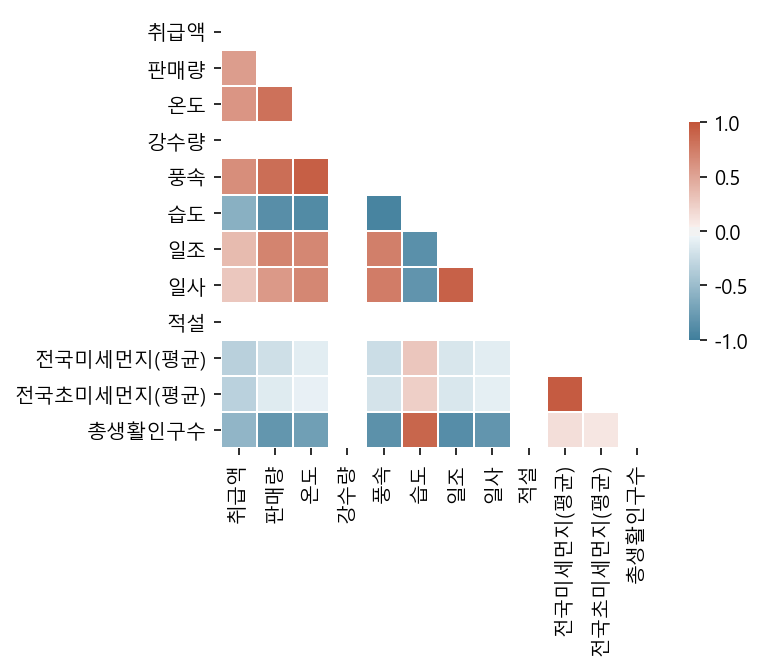


2월 시간대별(0시 ~ 23시) 상관관계 확인


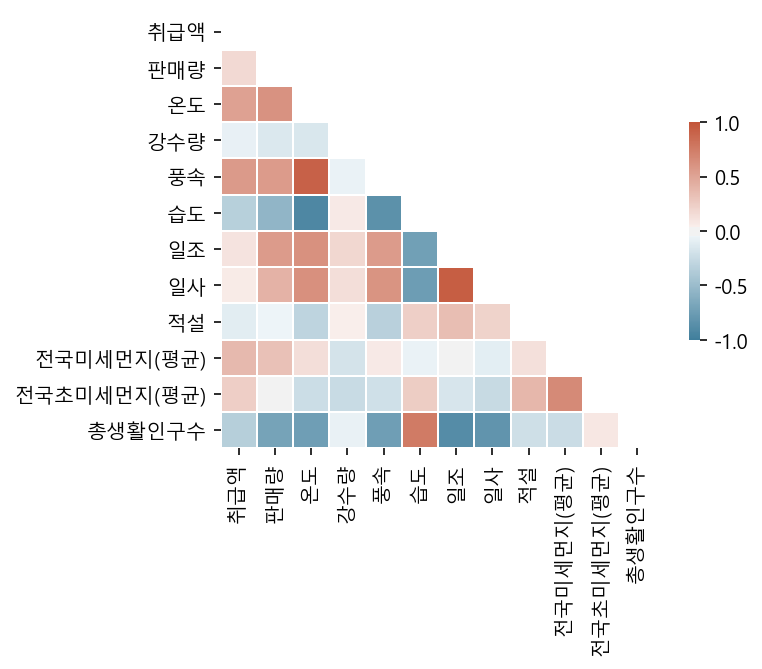


3월 시간대별(0시 ~ 23시) 상관관계 확인


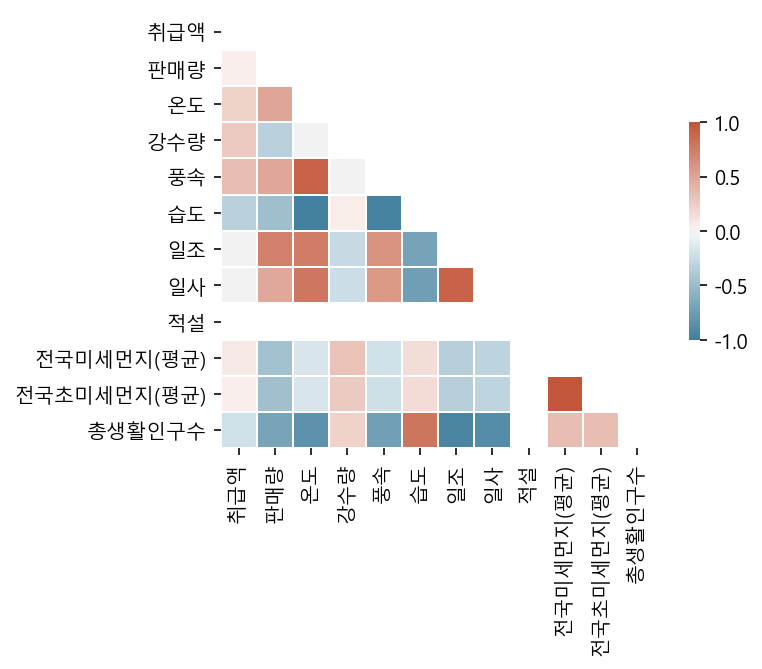


4월 시간대별(0시 ~ 23시) 상관관계 확인


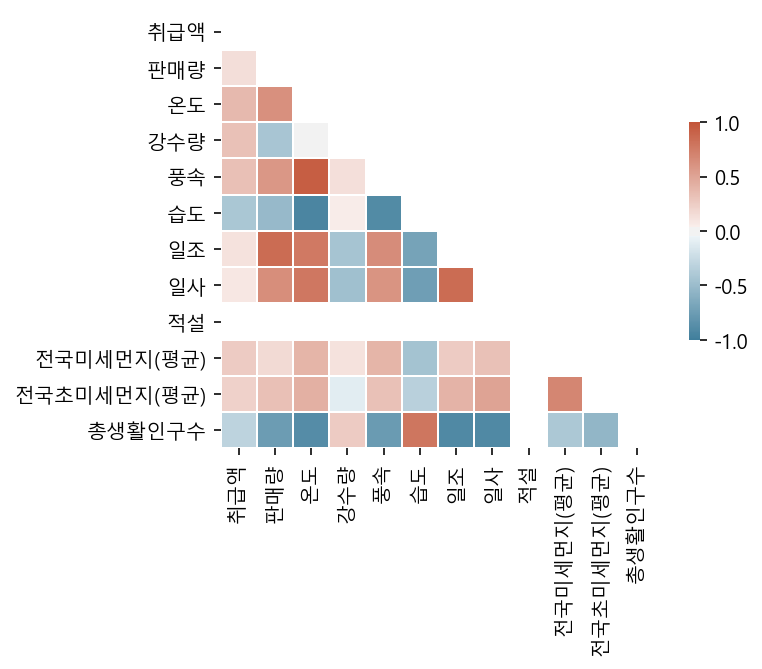


5월 시간대별(0시 ~ 23시) 상관관계 확인


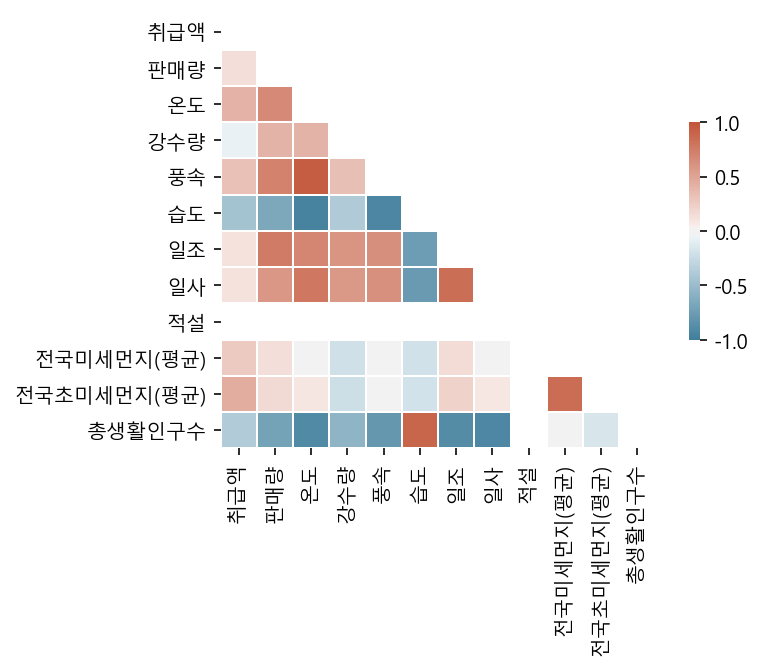


6월 시간대별(0시 ~ 23시) 상관관계 확인


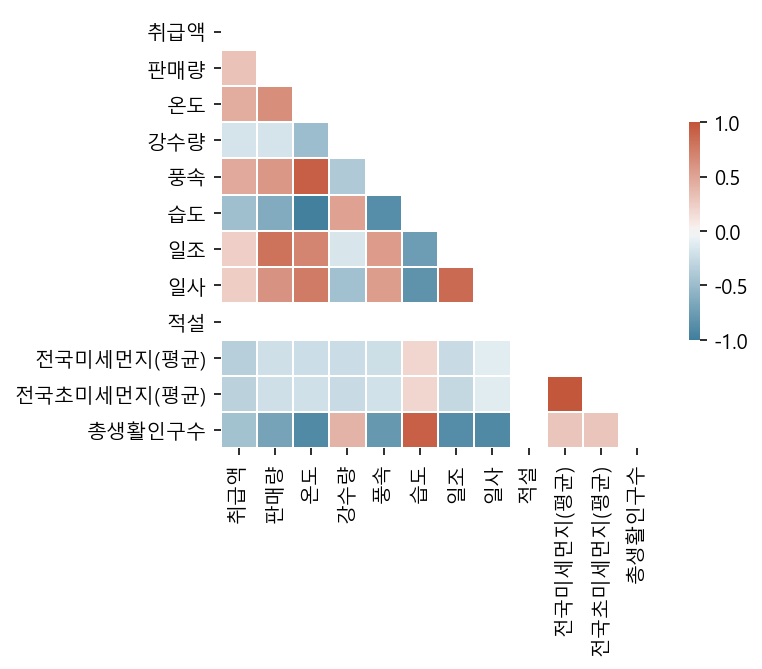


7월 시간대별(0시 ~ 23시) 상관관계 확인


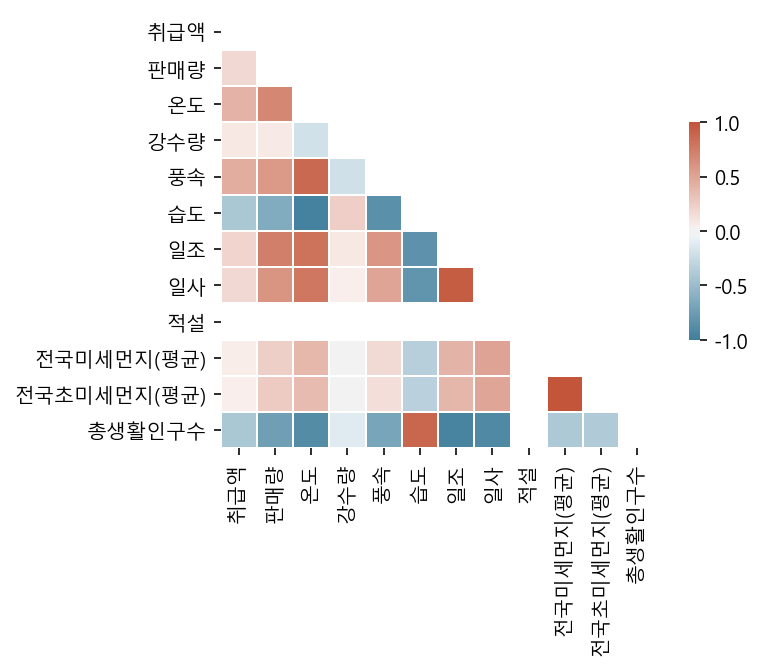


8월 시간대별(0시 ~ 23시) 상관관계 확인


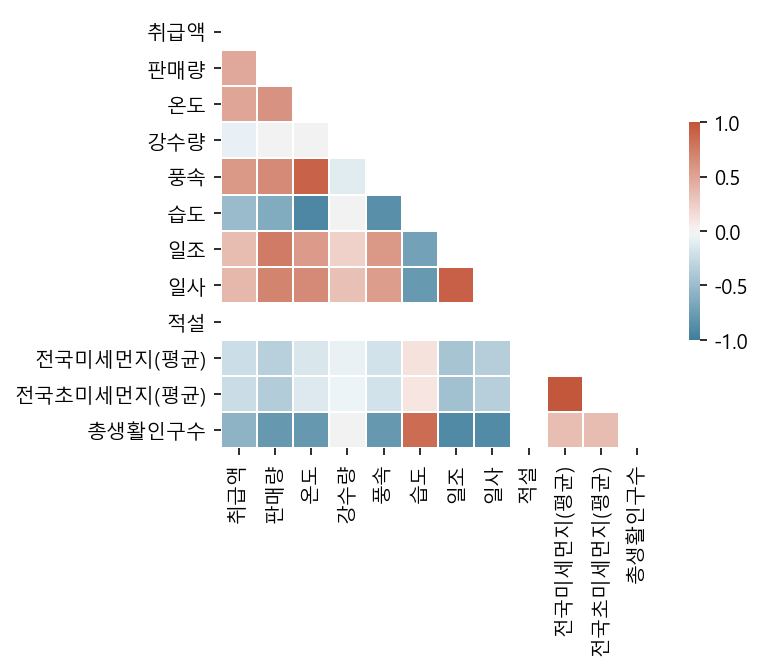


9월 시간대별(0시 ~ 23시) 상관관계 확인


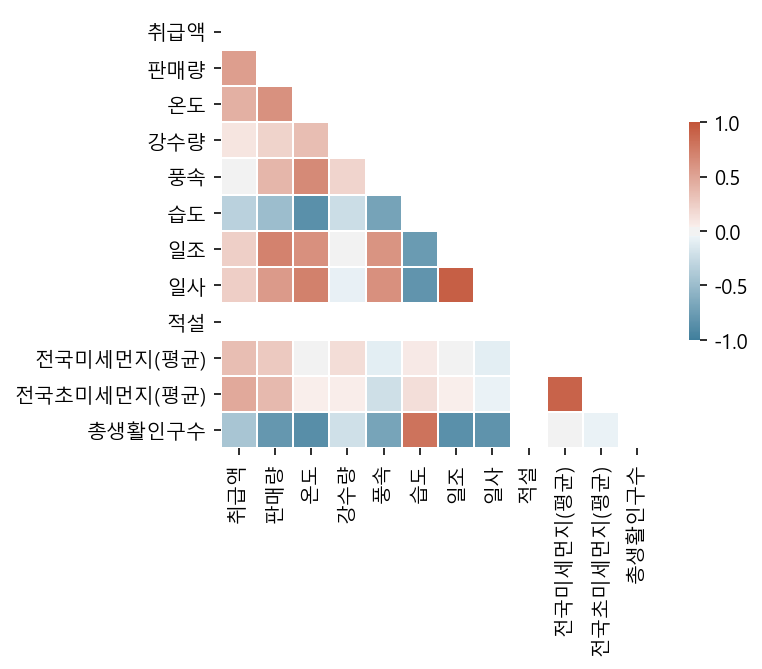


10월 시간대별(0시 ~ 23시) 상관관계 확인


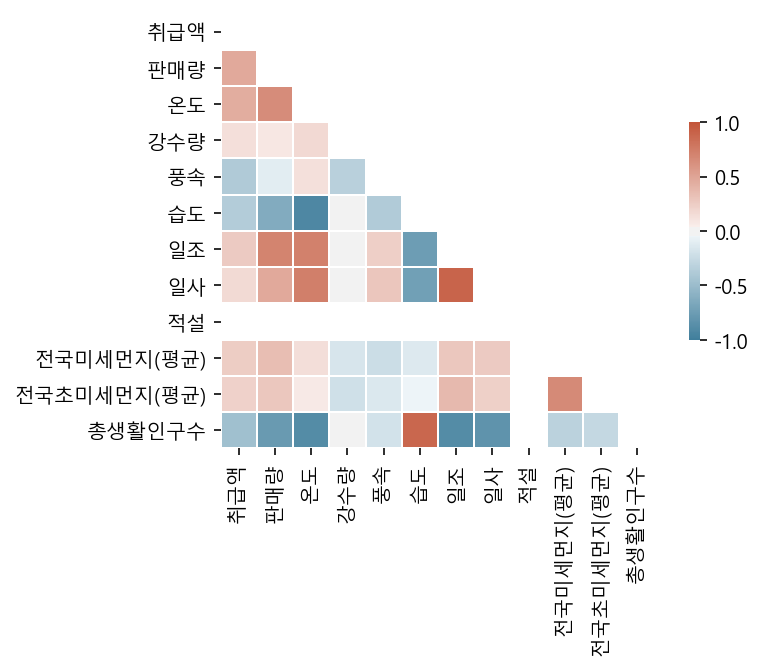


11월 시간대별(0시 ~ 23시) 상관관계 확인


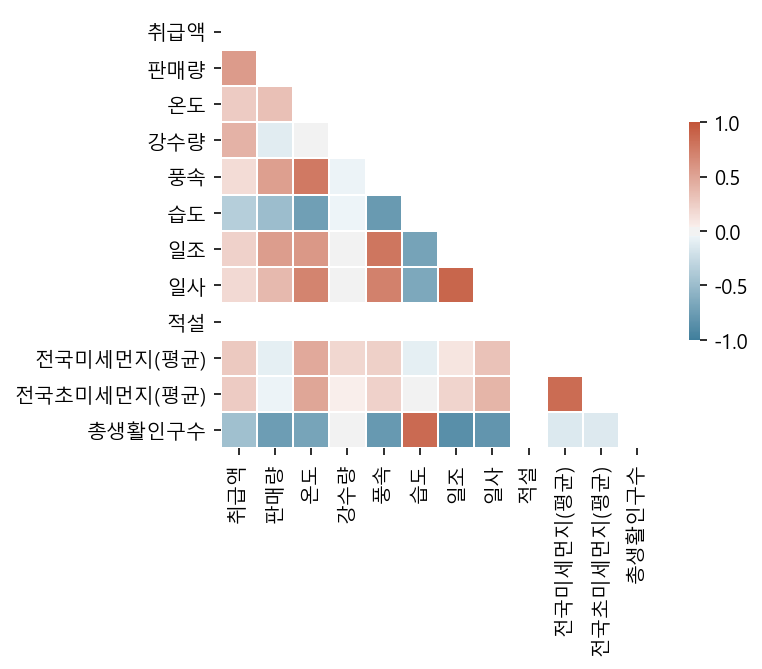


12월 시간대별(0시 ~ 23시) 상관관계 확인


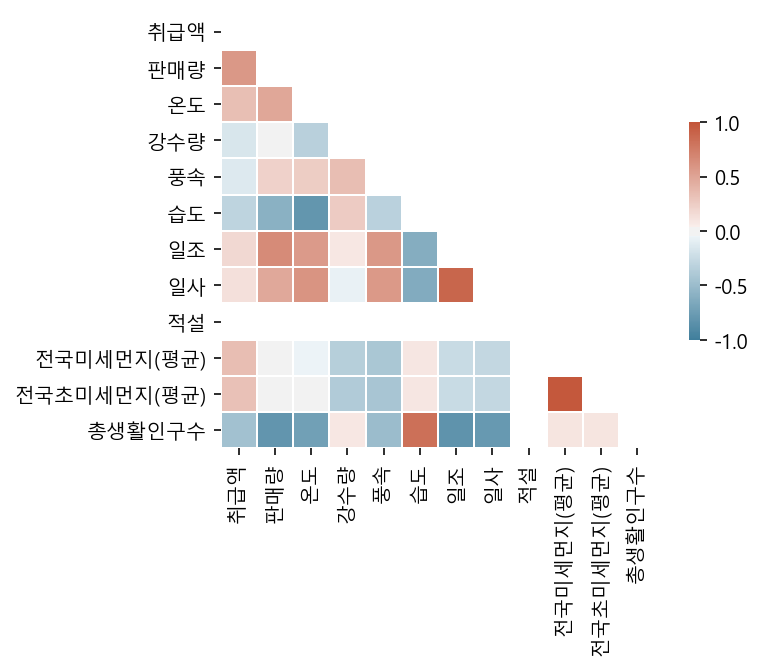

In [40]:
# 각 월별 총 생활인구와 시간대별 feature 상관관계
Y = ['취급액', '판매량']
X = ['온도', '강수량', '풍속', '습도', '일조', '일사', '적설', '전국미세먼지(평균)', '전국초미세먼지(평균)', '총생활인구수']

# 각 월별 확인
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for month, df in zip(months, dfs):
    print(f"{month}월 시간대별(0시 ~ 23시) 상관관계 확인")
    check_correlation(df, Y, X)
    print()

1월 시간대별(0시 ~ 23시) 상관관계 확인


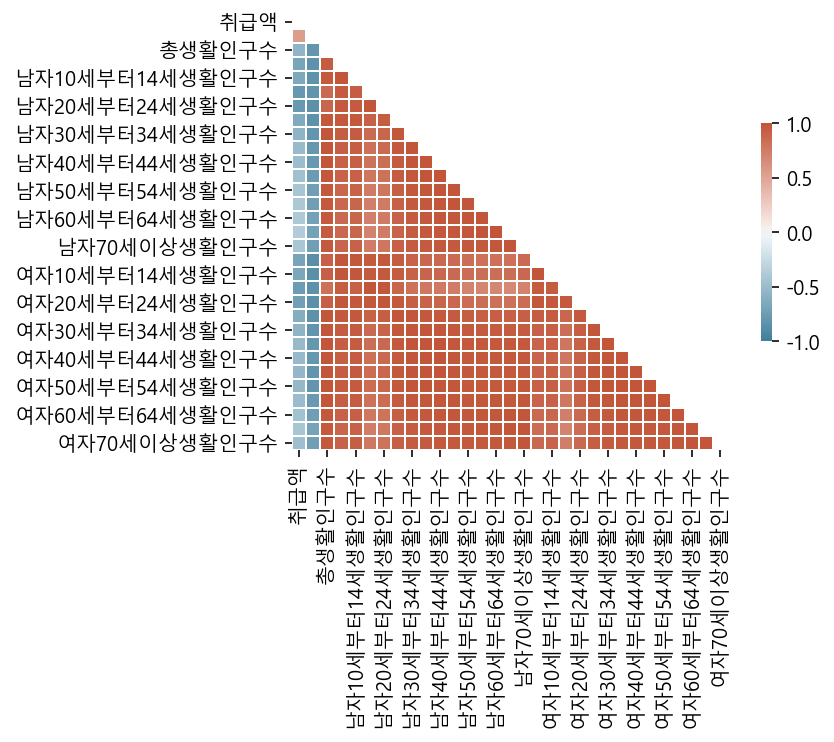


2월 시간대별(0시 ~ 23시) 상관관계 확인


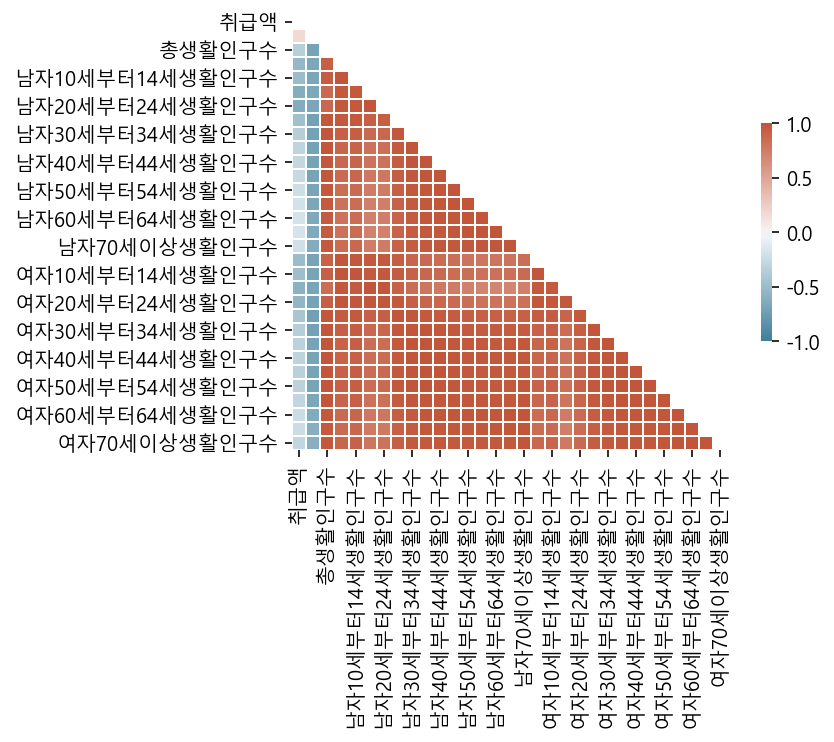


3월 시간대별(0시 ~ 23시) 상관관계 확인


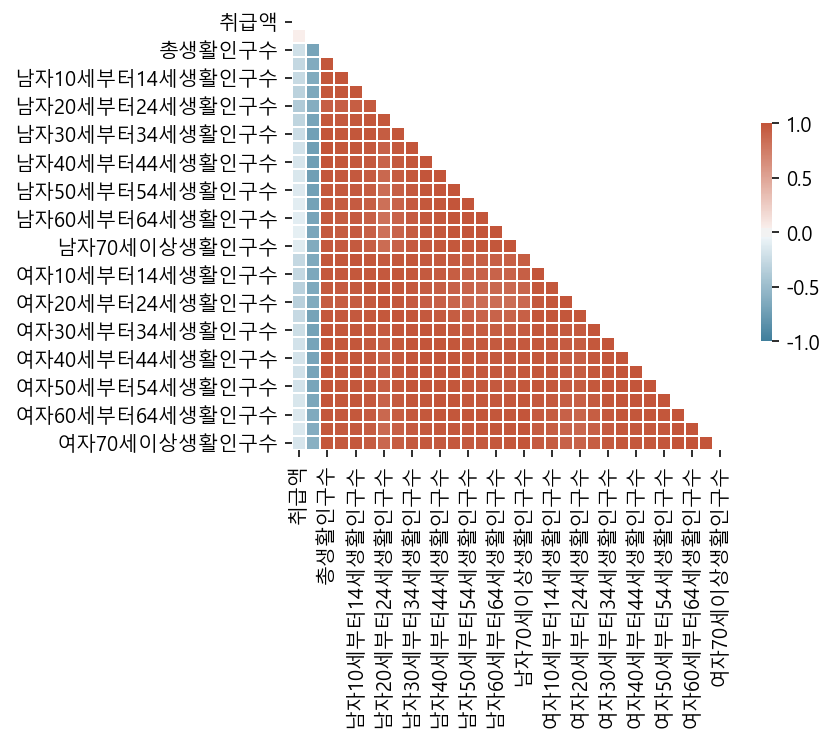


4월 시간대별(0시 ~ 23시) 상관관계 확인


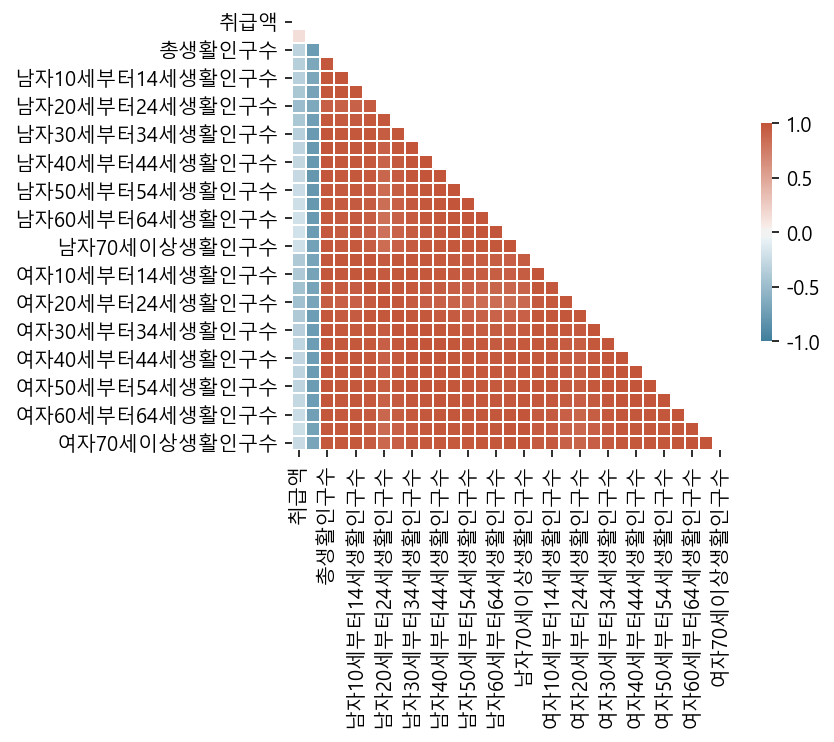


5월 시간대별(0시 ~ 23시) 상관관계 확인


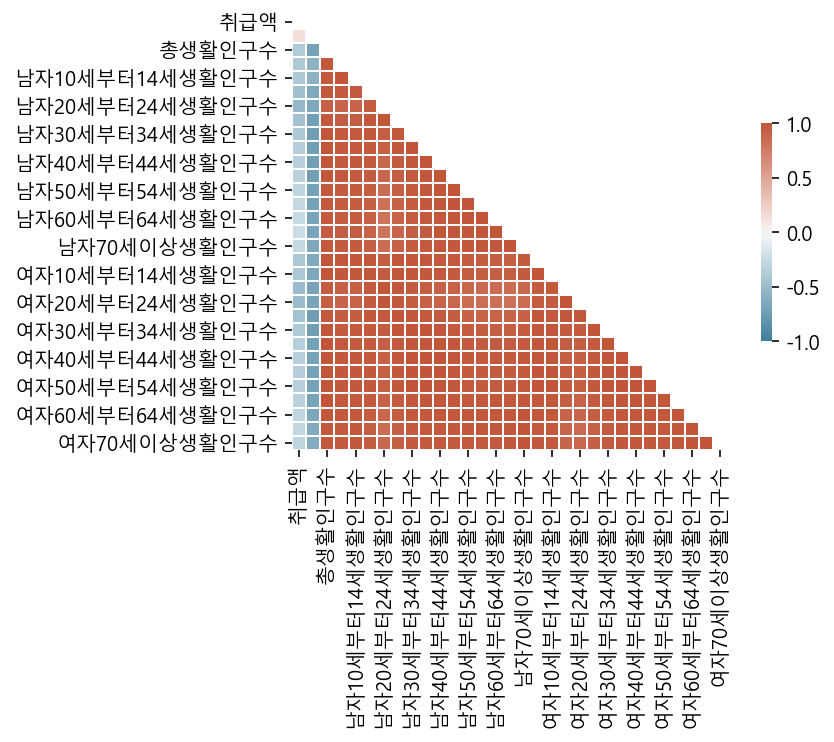


6월 시간대별(0시 ~ 23시) 상관관계 확인


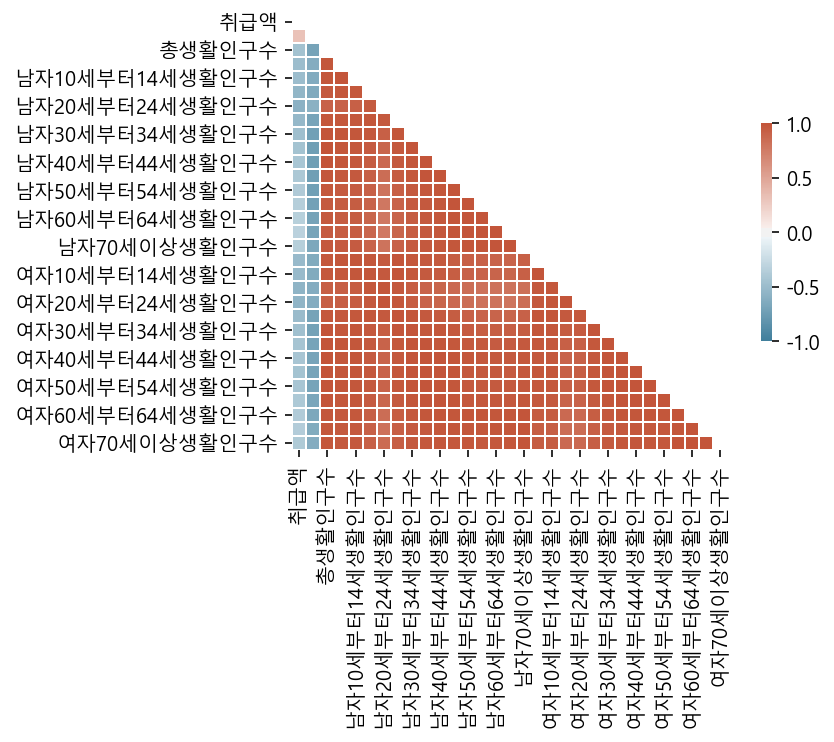


7월 시간대별(0시 ~ 23시) 상관관계 확인


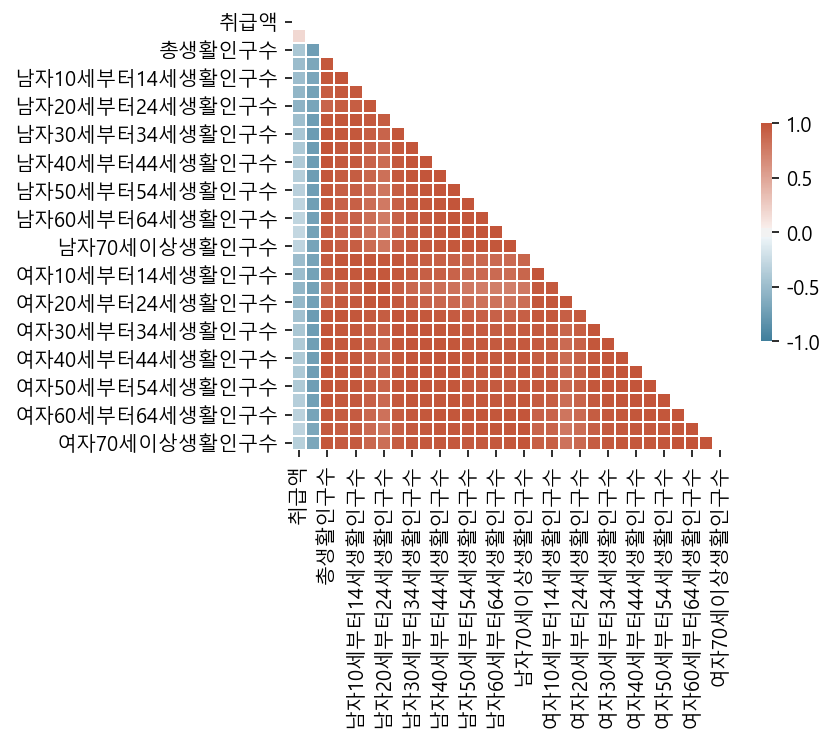


8월 시간대별(0시 ~ 23시) 상관관계 확인


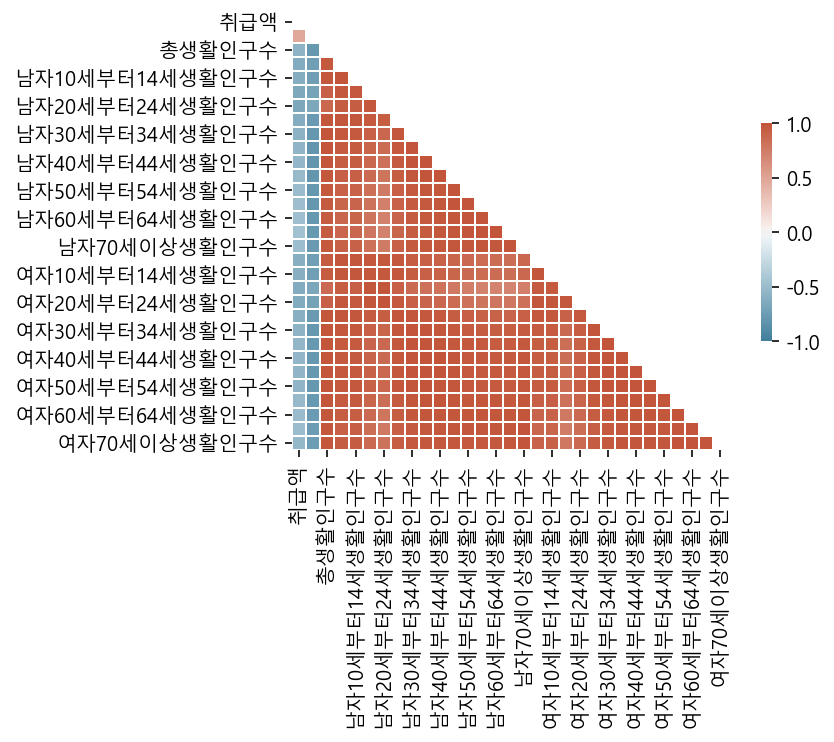


9월 시간대별(0시 ~ 23시) 상관관계 확인


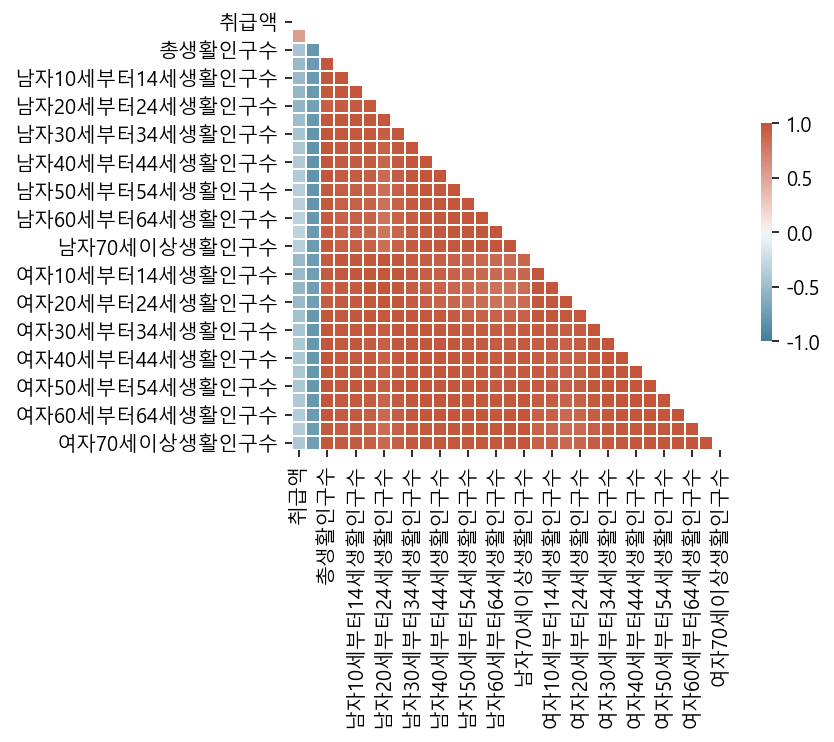


10월 시간대별(0시 ~ 23시) 상관관계 확인


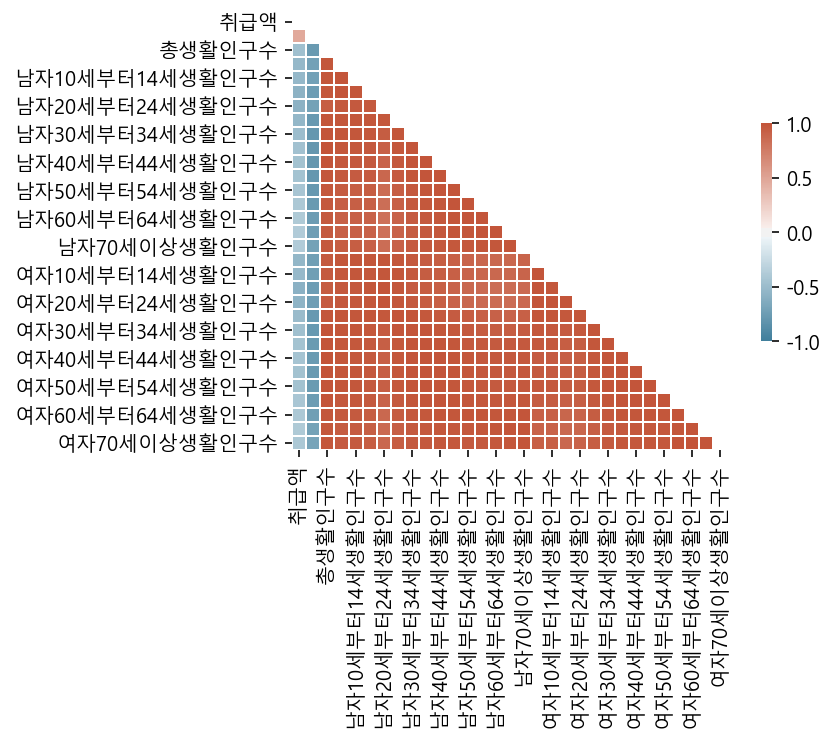


11월 시간대별(0시 ~ 23시) 상관관계 확인


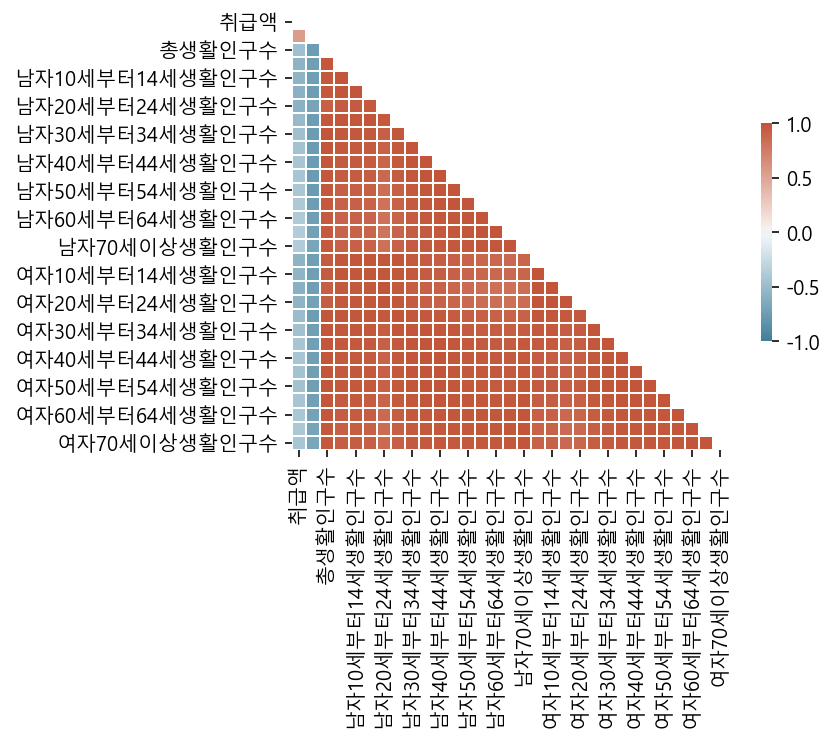


12월 시간대별(0시 ~ 23시) 상관관계 확인


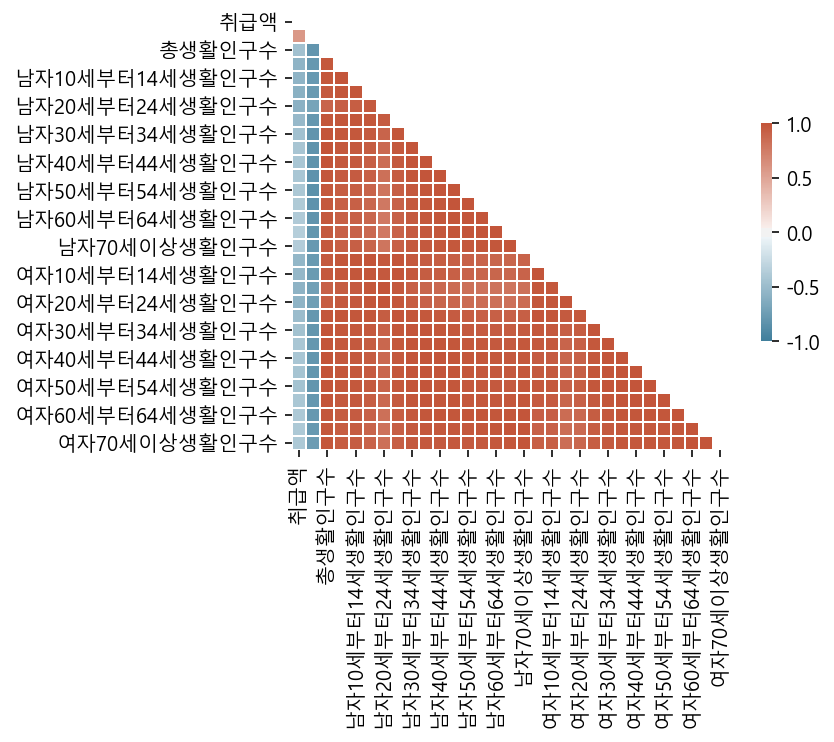

In [45]:
# 확인하고 싶은 feature
Y = ['취급액', '판매량']
X = ['총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자15세부터19세생활인구수',
     '남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수',
     '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수',
     '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수', 
     '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수',
     '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', 
     '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수']

# 각 월별 확인
dfs = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12]
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for month, df in zip(months, dfs):
    print(f"{month}월 시간대별(0시 ~ 23시) 상관관계 확인")
    check_correlation(df, Y, X)
    print()

## 월별 변수 상관관계

 월별로 집계할 수 있는 데이터 간 상관관계를 구한다.

- 경제지표 데이터
- 기후 데이터
- 생활인구 월별 데이터


*결과*

 월별로 보면 변수 간 관계가 시간대별로 봤을 때보다는 잘 보인다.

1. 양의 상관관계
    - 총생활인구수와 취급액, 판매량이 월별로 보면, 상관관계가 양으로 올라온다. 그러나 강하지는 않다.
    - 총 생활인구수와 미세먼지, 초미세먼지가 상관관계가 높아진다 -> 외출과 영향이 있을 듯?
    - 코스피와 상관관계가 양인데, 큰 양의 상관관계를 보인다. -> 이건 당장은 해석의 여지가 잘 보이지는 않는다.
  
  
2. 음의 상관관계
    - 온도와 일사가 생활인구수와 높은 음의 상관관계. -> 더울수록 안 나가나? 그럼 계절과는?
    - 고용률도 높은 음의 상관관계.




*다른 것 확인하고 싶으면*

- `X`, `Y` feature 조정.
- 총생활인구수와 각 연령대별 생활인구수 상관관계 높아서 확인은 안 했는데, 필요하면 확인하면 될듯.

In [46]:
# 데이터 로드
df_raw = pd.read_excel(NAME_CHANGED_DATA, usecols=lambda x: 'Unnamed' not in x)
df_econ = pd.read_excel(ECON_SENT_INDEX, usecols=lambda x: 'Unnamed' not in x)
df_kospi = pd.read_excel(KOSPI, usecols=lambda x: 'Unnamed' not in x)
df_industry = pd.read_excel(INDU_PROD_INDEX, usecols=lambda x: 'Unnamed' not in x)
df_employ = pd.read_excel(EMPLOYMENT, usecols=lambda x: 'Unnamed' not in x)
df_credit = pd.read_excel(CREDIT, usecols=lambda x: 'Unnamed' not in x)
df_life = pd.read_excel(LIFE_PRICE, usecols=lambda x: 'Unnamed' not in x)
df_producer_total = pd.read_excel(PRODUCER_PRICE_TOTAL, usecols=lambda x: 'Unnamed' not in x)
df_producer = pd.read_excel(PRODUCER_PRICE, usecols=lambda x: 'Unnamed' not in x)
df_consumer = pd.read_excel(CONSUMER_PRICE, usecols=lambda x: 'Unnamed' not in x)

In [47]:
# 코스피 말일 데이터 
df_kospi_ffill = df_kospi.copy()
df_kospi_ffill['코스피'] = df_kospi['코스피'].fillna(method='ffill') # 주말이라 없는 데이터
last_days = ['2019/01/31', '2019/02/28', '2019/03/31', '2019/04/30', '2019/05/31', '2019/06/30', '2019/07/31',
            '2019/08/31', '2019/09/30', '2019/10/31', '2019/11/30', '2019/12/31']
kospi_last = df_kospi_ffill.loc[df_kospi_ffill['시점'].isin(last_days)]
kospi_last

,시점,코스피
30,2019/01/31,2204.85
58,2019/02/28,2195.44
89,2019/03/31,2140.67
119,2019/04/30,2203.59
150,2019/05/31,2041.74
180,2019/06/30,2130.62
211,2019/07/31,2024.55
242,2019/08/31,1967.79
272,2019/09/30,2063.05
303,2019/10/31,2083.48


In [50]:
# 월별 방송시간대별 변수 집계
df_all = grouping_monthly(df_climate)

,월,판매량,취급액,온도,강수량,풍속,습도,일조,일사,적설,전국미세먼지(평균),전국초미세먼지(평균)
0,1,9.433613e+05,68705807000,-0.454352,0.000000,1.920850,45.330972,0.308907,0.412652,0.000000,58.160931,34.126518
1,2,7.504885e+05,59581381000,1.507917,0.043958,1.850625,47.055208,0.285208,0.486687,0.078958,54.854841,33.257169
2,3,8.161945e+05,64672766000,7.532218,0.058363,2.294278,49.110915,0.286796,0.604921,0.000000,61.163059,37.570578
3,4,7.603803e+05,60734701000,12.383775,0.080615,1.969086,49.129804,0.296157,0.681708,0.000000,41.568092,19.519867
4,5,8.702798e+05,68900078000,19.889165,0.031266,2.170389,43.513648,0.441356,0.986741,0.000000,48.968764,24.380382
5,6,8.745626e+05,66381136000,22.967881,0.067114,1.889453,58.331735,0.346309,0.897919,0.000000,32.874965,20.325588
6,7,9.572752e+05,68971461000,26.212427,0.214945,1.893199,67.935348,0.224769,0.626558,0.000000,26.451227,16.034375
7,8,1.065453e+06,69073374000,27.824745,0.214711,1.623724,66.508503,0.339286,0.747568,0.000000,27.982893,16.342287
8,9,9.480263e+05,67407686000,23.055004,0.162703,2.267408,62.597092,0.265355,0.640701,0.000000,23.834732,12.059405
9,10,9.991602e+05,68843479000,17.048955,0.058275,2.207578,60.458188,0.349564,0.612456,0.000000,31.069930,14.960680


In [68]:
# 경제지수 합치기
df_all['경제심리지수'] = df_econ.iloc[:12, -1]
df_all['코스피'] = kospi_last['코스피'].tolist()
df_all['전산업생산지수'] = df_industry.iloc[:12, -1]
df_all['고용률'] = df_employ.iloc[:12, -1]
df_all['개인별신용카드사용액'] = df_credit.iloc[12:24, -1].tolist()
df_all['생활물가지수'] = df_life.iloc[:12, -1]
df_all['생산자물가지수'] = df_producer_total.iloc[:12, -1]
df_all['소비자물가지수'] = df_consumer.iloc[:12, -1]
df_all = df_all.set_index('월') # merge 위해 인덱스 '월'로 설정
df_all

,판매량,취급액,온도,강수량,풍속,습도,일조,일사,적설,전국미세먼지(평균),전국초미세먼지(평균),경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수
월,,,,,,,,,,,,,,,,,,,
1,9.433613e+05,68705807000,-0.454352,0.000000,1.920850,45.330972,0.308907,0.412652,0.000000,58.160931,34.126518,89.8,2204.85,105.0,59.2,52039328,104.03,102.92,104.24
2,7.504885e+05,59581381000,1.507917,0.043958,1.850625,47.055208,0.285208,0.486687,0.078958,54.854841,33.257169,95.6,2195.44,95.9,59.4,45466358,104.61,103.02,104.69
3,8.161945e+05,64672766000,7.532218,0.058363,2.294278,49.110915,0.286796,0.604921,0.000000,61.163059,37.570578,94.7,2140.67,108.4,60.4,51678679,104.45,103.38,104.49
4,7.603803e+05,60734701000,12.383775,0.080615,1.969086,49.129804,0.296157,0.681708,0.000000,41.568092,19.519867,95.8,2203.59,107.8,60.8,50723386,104.81,103.68,104.87
5,8.702798e+05,68900078000,19.889165,0.031266,2.170389,43.513648,0.441356,0.986741,0.000000,48.968764,24.380382,92.1,2041.74,109.1,61.5,53425506,105.29,103.79,105.05
6,8.745626e+05,66381136000,22.967881,0.067114,1.889453,58.331735,0.346309,0.897919,0.000000,32.874965,20.325588,92.8,2130.62,109.4,61.6,50508891,105.19,103.50,104.88
7,9.572752e+05,68971461000,26.212427,0.214945,1.893199,67.935348,0.224769,0.626558,0.000000,26.451227,16.034375,89.6,2024.55,108.3,61.5,53730267,104.40,103.50,104.56
8,1.065453e+06,69073374000,27.824745,0.214711,1.623724,66.508503,0.339286,0.747568,0.000000,27.982893,16.342287,88.8,1967.79,106.0,61.4,52485647,104.73,103.74,104.81
9,9.480263e+05,67407686000,23.055004,0.162703,2.267408,62.597092,0.265355,0.640701,0.000000,23.834732,12.059405,91.7,2063.05,105.8,61.5,50893769,105.57,103.80,105.20


In [65]:
# 각 월별 생활인구수 평균
df_p = pd.concat([df_p1['means'].mean(), df_p2['means'].mean(), df_p3['means'].mean(), df_p4['means'].mean(),
                  df_p5['means'].mean(), df_p6['means'].mean(), df_p7['means'].mean(), df_p8['means'].mean(),
                  df_p9['means'].mean(), df_p10['means'].mean(), df_p11['means'].mean(), df_p12['means'].mean()], axis=1)
df_p.columns = df_p.columns + 1 # 월로 매핑하기 위해 1씩 column 증가
df_p = df_p.T.iloc[:, 2:-1] # 기준일 id, 행정동 코드, 주거지 제외
df_p

,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
1,22924.814172,873.897214,468.503195,600.644368,731.966842,799.954084,738.783725,877.712720,810.399108,886.401890,...,826.095384,810.136715,941.435822,856.966254,951.202255,855.298535,984.104728,901.773353,688.398640,1814.588638
2,22385.911871,859.334805,461.303007,580.252967,685.063577,775.291822,725.357017,867.321579,804.162242,878.056958,...,792.390490,785.084595,917.240146,837.496026,931.600747,838.627779,964.999658,883.228524,674.546767,1775.215913
3,22801.640779,897.375437,478.196879,577.789243,653.818462,796.456057,751.542291,892.419570,822.737348,892.169631,...,831.830458,818.913358,950.462975,863.172617,954.694240,855.538799,978.846347,893.709082,678.486623,1779.542575
4,22262.825344,884.204960,472.935740,569.613069,619.779979,773.859415,727.678926,863.041976,795.765228,866.169351,...,814.033592,798.250602,928.889638,846.211971,938.187795,839.537904,954.492668,871.388690,660.721947,1741.196750
5,21469.930155,830.637779,442.365779,544.650607,602.319561,756.267469,716.233230,843.812024,772.365701,839.759332,...,799.087348,782.649457,898.870569,814.715080,903.125366,808.486427,918.272713,838.647022,636.809743,1683.477143
6,21558.853595,840.048250,448.494413,558.223796,616.816979,764.932484,722.731513,848.369934,775.002693,842.797632,...,809.766647,790.030630,902.215312,816.430384,901.809243,802.803406,911.022020,831.436756,631.638104,1672.232566
7,21234.290974,809.960472,431.824964,553.343800,635.303611,762.964467,712.098672,836.282157,763.073556,833.447818,...,799.773663,777.801557,886.461128,798.216262,882.225859,790.194061,898.561474,817.363525,619.181080,1636.012221
8,21922.969301,828.318557,442.229792,574.761720,658.660160,792.850468,740.499496,868.520261,792.155344,865.244547,...,822.980151,797.748168,910.514095,823.976982,915.530379,820.350587,930.929247,842.601757,639.358864,1673.485054
9,22145.311346,852.146728,456.628349,571.757073,626.539561,776.563669,740.068746,876.956526,807.074441,879.414557,...,820.426950,803.772545,926.658879,844.416231,930.106870,832.299735,946.692558,857.132079,649.102961,1687.386089
10,22011.973827,854.717203,457.685143,571.219327,614.168519,779.727135,741.266260,872.069777,799.792437,871.468877,...,831.152163,806.431218,925.623038,841.153318,926.510165,827.224112,938.507854,847.075920,640.240680,1662.534107


In [71]:
# 경제지표 데이터, 인구 데이터, 생활인구 데이터 + 내부 데이터 모두 병합
df = df_all.merge(df_p, left_index=True, right_index=True, how='left')

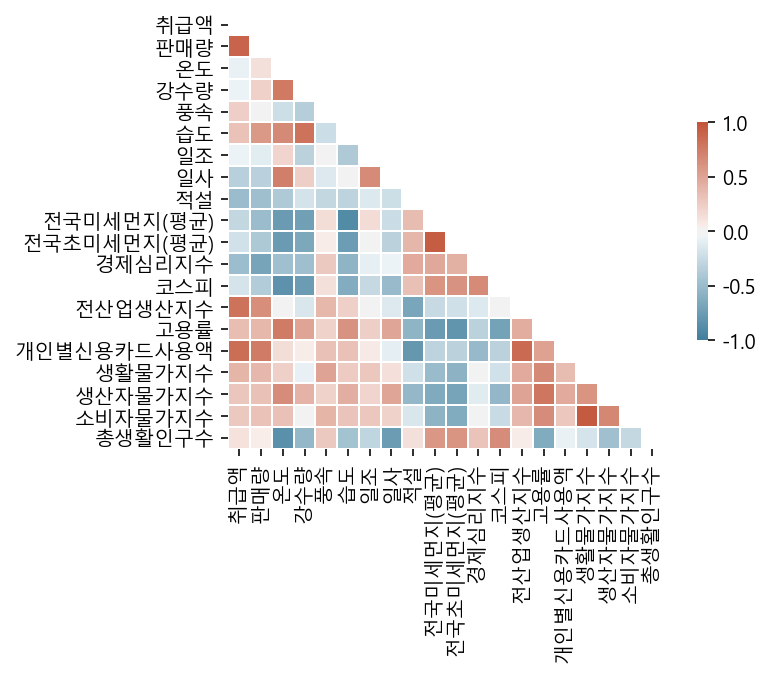

,취급액,판매량,온도,강수량,풍속,습도,일조,일사,적설,전국미세먼지(평균),전국초미세먼지(평균),경제심리지수,코스피,전산업생산지수,고용률,개인별신용카드사용액,생활물가지수,생산자물가지수,소비자물가지수,총생활인구수
취급액,1.000000,0.904258,-0.068729,-0.049573,0.243862,0.314611,-0.051332,-0.341781,-0.495415,-0.274503,-0.197601,-0.485377,-0.175911,0.812684,0.347174,0.841122,0.401333,0.293032,0.274604,0.119188
판매량,0.904258,1.000000,0.127984,0.220867,0.011670,0.581566,-0.106282,-0.325144,-0.469855,-0.496952,-0.392264,-0.688817,-0.365406,0.647574,0.384237,0.765082,0.379153,0.323740,0.316770,0.048909
온도,-0.068729,0.127984,1.000000,0.769118,-0.219769,0.671174,0.209668,0.737843,-0.384719,-0.762012,-0.760406,-0.462512,-0.835850,-0.008185,0.761893,0.153445,0.227838,0.652049,0.322566,-0.847784
강수량,-0.049573,0.220867,0.769118,1.000000,-0.358921,0.806257,-0.319982,0.236964,-0.184598,-0.720682,-0.657888,-0.472782,-0.756090,-0.149041,0.501734,0.056381,-0.071082,0.416907,0.024387,-0.524427
풍속,0.243862,0.011670,-0.219769,-0.358921,1.000000,-0.229385,0.026022,-0.127938,-0.281107,0.150885,0.054709,0.280695,0.132234,0.386585,0.213250,0.324520,0.512752,0.216253,0.401105,0.273889
습도,0.314611,0.581566,0.671174,0.806257,-0.229385,1.000000,-0.385248,0.034467,-0.306378,-0.891195,-0.745717,-0.562394,-0.619333,0.229987,0.610999,0.325281,0.263288,0.444207,0.306608,-0.443271
일조,-0.051332,-0.106282,0.209668,-0.319982,0.026022,-0.385248,1.000000,0.661630,-0.136013,0.159174,-0.006791,-0.082643,-0.261622,-0.030033,0.241232,0.070898,0.284725,0.209113,0.284566,-0.290008
일사,-0.341781,-0.325144,0.737843,0.236964,-0.127938,0.034467,0.661630,1.000000,-0.223619,-0.234937,-0.318789,-0.049833,-0.508874,-0.127179,0.499792,-0.090512,0.135815,0.496247,0.215343,-0.757483
적설,-0.495415,-0.469855,-0.384719,-0.184598,-0.281107,-0.306378,-0.136013,-0.223619,1.000000,0.352825,0.395969,0.464750,0.331084,-0.677897,-0.559286,-0.791062,-0.210212,-0.529346,-0.154320,0.127024
전국미세먼지(평균),-0.274503,-0.496952,-0.762012,-0.720682,0.150885,-0.891195,0.159174,-0.234937,0.352825,1.000000,0.951110,0.477323,0.605216,-0.252432,-0.764493,-0.311209,-0.505627,-0.643415,-0.564318,0.592221


In [73]:
# 총 생활인구수와 확인하고 싶은 feature
Y = ['취급액', '판매량']
X = ['온도', '강수량', '풍속', '습도', '일조', '일사', '적설', '전국미세먼지(평균)', '전국초미세먼지(평균)', 
     '경제심리지수', '코스피', '전산업생산지수', '고용률', '개인별신용카드사용액', '생활물가지수', '생산자물가지수', '소비자물가지수', 
     '총생활인구수']
corr_1 = check_correlation(df, Y, X)
display(corr_1)

In [ ]:
# 총 생활인구수와 확인하고 싶은 feature
Y = ['취급액', '판매량']
X = ['온도', '강수량', '풍속', '습도', '일조', '일사', '적설', '전국미세먼지(평균)', '전국초미세먼지(평균)', 
     '경제심리지수', '코스피', '전산업생산지수', '고용률', '개인별신용카드사용액', '생활물가지수', '생산자물가지수', '소비자물가지수', 
     '총생활인구수']
corr_1 = check_correlation(df, Y, X)
display(corr_1)